In [1]:
import pandas as pd
from sqlalchemy import create_engine, inspect
import matplotlib.pyplot as plt
import seaborn as sns

from config import DB_USER, DB_NAME, DB_PW, DB_SCHEMA

In [2]:
# Connection details
db_user = DB_USER
db_password = DB_PW
db_host = "localhost"   # or IP address if remote
db_port = "5432"        # default PostgreSQL port
db_name = DB_NAME
db_schema = DB_SCHEMA

# Create SQLAlchemy engine
engine = create_engine(
    f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}",
    connect_args={'options': f'-csearch_path={db_schema}'}
)

inspector = inspect(engine)


In [3]:
# VERIFY TABLES
table_names = inspector.get_table_names()
print(table_names)

['atl_food_place', 'menu_items']


In [4]:
# PLACE DATA IN PANDAS DFS
atl_food_palce_df = pd.read_sql("SELECT * FROM atl_food_place", engine)
menu_items_df = pd.read_sql("SELECT * FROM menu_items", engine)
avg_nutr_df = pd.read_sql("SELECT * FROM gusto_avg_nutrition", engine)
gusto_nutr_df = pd.read_sql("SELECT * FROM gusto_nutrition", engine)

In [5]:
# PREVIEW places
atl_food_palce_df.head()

,atl_food_place_id,title,slug,categories,lat,lng,created_at,updated_at
0,1,Salata,salata,"healthy, salad",33.775006,-84.365838,2025-09-29 01:59:24.904767+00:00,2025-09-29 01:59:24.904767+00:00
1,2,Gusto! Healthy Bowls & Wraps (West End),gusto_healthy_bowls_wraps_west_end,"fast food, healthy bowls",33.736800,-84.421600,2025-09-29 01:59:24.904767+00:00,2025-09-29 01:59:24.904767+00:00
2,3,Honeysuckle Gelato (West End),honeysuckle,ice cream shop,33.736800,-84.421600,2025-09-29 01:59:24.904767+00:00,2025-09-29 01:59:24.904767+00:00
3,4,Sakera Sake Bar & Bottles (West End),sakera,"bar, sake bar",33.736800,-84.421600,2025-09-29 01:59:24.904767+00:00,2025-09-29 01:59:24.904767+00:00
4,5,Starbucks (Moreland Ave NE),starbucks_moreland,coffee shop,33.759900,-84.349400,2025-09-29 01:59:24.904767+00:00,2025-09-29 01:59:24.904767+00:00


In [6]:
# PREVIEW menu_items
menu_items_df.head()

,menu_item_id,atl_food_place_id,title,slug,calories,protein_g,carbs_g,fat_g,cholesterol_mg,sodium_mg,nutrition_score,created_at,updated_at
0,162,2,Queso Verde Queso | Mixed Greens| Grilled Spic...,queso_verde_queso_mixed_greens_grilled_spicy_c...,334,43.0,16.0,12.0,175.0,1240.0,3.04,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00
1,163,2,Queso Verde Queso | Mixed Greens| Grilled Chicken,queso_verde_queso_mixed_greens_grilled_chicken,334,42.0,14.0,13.0,175.0,1159.0,3.02,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00
2,164,2,Sweet Soy Sriracha | Mixed Greens| Grilled Spi...,sweet_soy_sriracha_mixed_greens_grilled_spicy_...,363,44.0,18.0,15.0,173.0,1242.0,2.92,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00
3,165,2,Sweet Soy Sriracha | Mixed Greens| Grilled Chi...,sweet_soy_sriracha_mixed_greens_grilled_chicken,363,43.0,16.0,16.0,173.0,1161.0,2.91,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00
4,166,2,Tahini Cucumber Feta | Mixed Greens| Grilled S...,tahini_cucumber_feta_mixed_greens_grilled_shrimp,339,25.0,22.0,17.0,163.0,1859.0,2.87,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00


In [7]:
# PREVIEW nutritional score view
avg_nutr_df_sorted = avg_nutr_df.sort_values("avg_nutrition_score", ascending=True)  # ascending=True because hbar inverts Y
avg_nutr_df_sorted

,protein_type,avg_nutrition_score
4,Avocado,1.78
3,Tofu,1.94
2,Grilled Chicken,2.27
1,Spicy Chicken,2.28
0,Shrimp,2.35


ERROR! Session/line number was not unique in database. History logging moved to new session 28


In [8]:
# define colors

# Map protein types to custom colors
protein_colors = {
    "Grilled Chicken": "saddlebrown",
    "Spicy Chicken": "red",
    "Shrimp": "orange",
    "Tofu": "black",
    "Avocado": "green",
    "Other": "gray"
}

# Match colors to df order
colors = avg_nutr_df_sorted["protein_type"].map(protein_colors)
colors

4          green
3          black
2    saddlebrown
1            red
0         orange
Name: protein_type, dtype: object

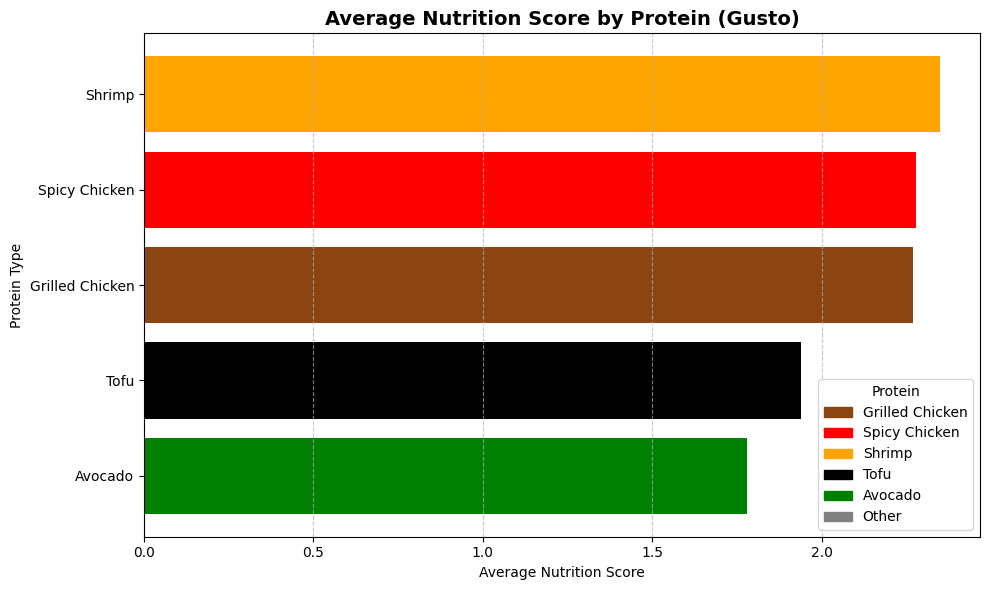

In [9]:
# create horizontal bar chart
plt.figure(figsize=(10,6))

bars = plt.barh(avg_nutr_df_sorted["protein_type"], avg_nutr_df_sorted["avg_nutrition_score"], color=colors)

# Gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Labels and Title
plt.xlabel("Average Nutrition Score")
plt.ylabel("Protein Type")
plt.title("Average Nutrition Score by Protein (Gusto)", fontsize=14, weight="bold")

# Add legend manually (from protein_colors mapping)
handles = [plt.Rectangle((0,0),1,1, color=protein_colors[p]) for p in protein_colors.keys()]
plt.legend(handles, protein_colors.keys(), title="Protein")


# Save as PNG
plt.tight_layout()  # avoid label cutoff
plt.savefig("avg_nutrition_by_protein.png", dpi=300, bbox_inches="tight")  # high-res PNG

plt.show()



In [10]:
# PREVIEW raw gusto data
gusto_nutr_df.head()

,menu_item_id,atl_food_place_id,title,slug,calories,protein_g,carbs_g,fat_g,cholesterol_mg,sodium_mg,nutrition_score,created_at,updated_at,protein_type
0,162,2,Queso Verde Queso | Mixed Greens| Grilled Spic...,queso_verde_queso_mixed_greens_grilled_spicy_c...,334,43.0,16.0,12.0,175.0,1240.0,3.04,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00,Spicy Chicken
1,163,2,Queso Verde Queso | Mixed Greens| Grilled Chicken,queso_verde_queso_mixed_greens_grilled_chicken,334,42.0,14.0,13.0,175.0,1159.0,3.02,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00,Grilled Chicken
2,164,2,Sweet Soy Sriracha | Mixed Greens| Grilled Spi...,sweet_soy_sriracha_mixed_greens_grilled_spicy_...,363,44.0,18.0,15.0,173.0,1242.0,2.92,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00,Spicy Chicken
3,165,2,Sweet Soy Sriracha | Mixed Greens| Grilled Chi...,sweet_soy_sriracha_mixed_greens_grilled_chicken,363,43.0,16.0,16.0,173.0,1161.0,2.91,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00,Grilled Chicken
4,166,2,Tahini Cucumber Feta | Mixed Greens| Grilled S...,tahini_cucumber_feta_mixed_greens_grilled_shrimp,339,25.0,22.0,17.0,163.0,1859.0,2.87,2025-09-29 02:13:35.454421+00:00,2025-09-29 02:13:35.454421+00:00,Shrimp


In [21]:
gusto_nutr_df['nutrition_score'].groupby(gusto_nutr_df.protein_type).mean()

protein_type
Avocado            1.779375
Grilled Chicken    2.274062
Shrimp             2.345625
Spicy Chicken      2.278437
Tofu               1.939062
Name: nutrition_score, dtype: float64

In [29]:
# define colors

# Map protein types to custom colors
protein_colors = {
    "Grilled Chicken": "saddlebrown",
    "Spicy Chicken": "red",
    "Shrimp": "orange",
    "Tofu": "black",
    "Avocado": "green",
    "Other": "gray"
}

# Match colors to df order

protein_colors

{'Grilled Chicken': 'saddlebrown',
 'Spicy Chicken': 'red',
 'Shrimp': 'orange',
 'Tofu': 'black',
 'Avocado': 'green',
 'Other': 'gray'}

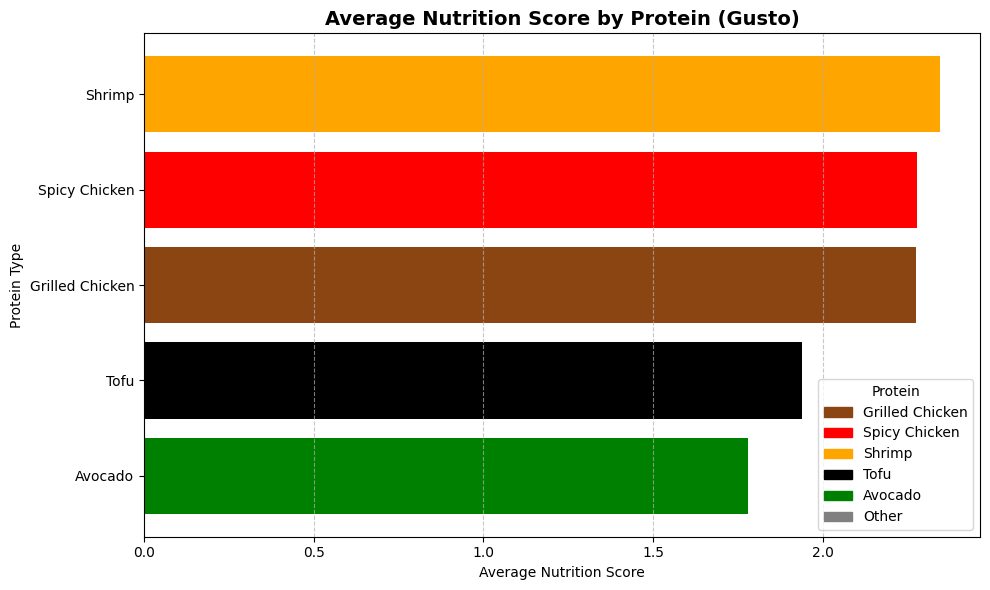

In [32]:
# create horizontal bar chart
plt.figure(figsize=(10,6))

avg_scores = (
    gusto_nutr_df.groupby("protein_type")["nutrition_score"]
    .mean()
    .sort_values(ascending=True)
)
colors = avg_scores.index.map(protein_colors)
bars = plt.barh(avg_scores.index, avg_scores.values, color=colors)


# Gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Labels and Title
plt.xlabel("Average Nutrition Score")
plt.ylabel("Protein Type")
plt.title("Average Nutrition Score by Protein (Gusto)", fontsize=14, weight="bold")

# Add legend manually (from protein_colors mapping)
handles = [plt.Rectangle((0,0),1,1, color=protein_colors[p]) for p in protein_colors.keys()]
plt.legend(handles, protein_colors.keys(), title="Protein")


# Save as PNG
plt.tight_layout()  # avoid label cutoff
plt.savefig("avg_nutrition_by_protein.png", dpi=300, bbox_inches="tight")  # high-res PNG

plt.show()



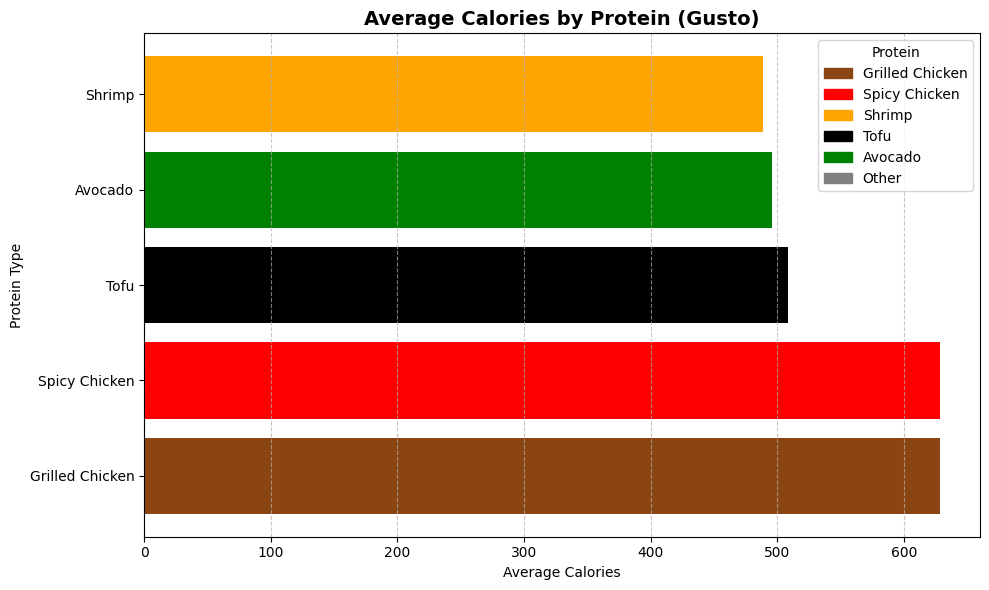

In [33]:
# create horizontal bar chart
plt.figure(figsize=(10,6))

avg_cals = (
    gusto_nutr_df.groupby("protein_type")["calories"]
    .mean()
    .sort_values(ascending=False)
)
colors = avg_cals.index.map(protein_colors)
bars = plt.barh(avg_cals.index, avg_cals.values, color=colors)


# Gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Labels and Title
plt.xlabel("Average Calories")
plt.ylabel("Protein Type")
plt.title("Average Calories by Protein (Gusto)", fontsize=14, weight="bold")

# Add legend manually (from protein_colors mapping)
handles = [plt.Rectangle((0,0),1,1, color=protein_colors[p]) for p in protein_colors.keys()]
plt.legend(handles, protein_colors.keys(), title="Protein")


# Save as PNG
plt.tight_layout()  # avoid label cutoff
plt.savefig("avg_calories_by_protein.png", dpi=300, bbox_inches="tight")  # high-res PNG

plt.show()